In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib notebook

## Problem 1

Use the FuncAnimation class to animate the function $y = sin(x + \frac{t}{10})$ where $x \in [0, 2\pi]$, and t ranges from 0 to 100 seconds.

In [3]:
def update(i):

    #put the new data for the line. It is updating at all the points
    traj.set_data(x,np.sin(x+(t[i]/10)))
    return traj

<IPython.core.display.Javascript object>


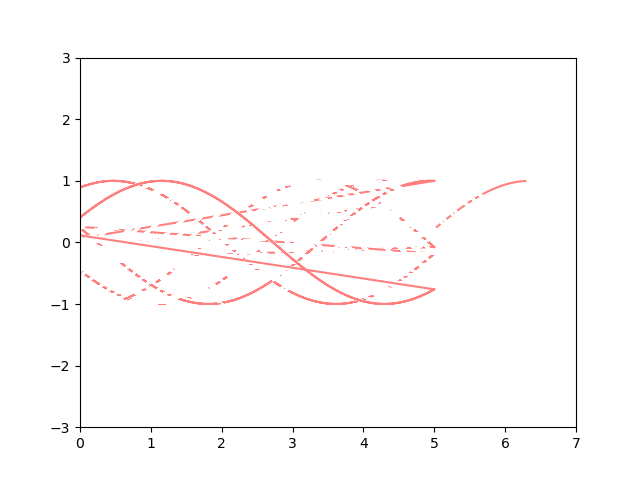

In [4]:
#all  the possible points that we are moving over.
x = np.linspace(0,2*np.pi,100)
t = np.arange(0,100)

#creates the actual box
fig=plt.figure()
#tells how many boxes to put in the box.
ax=fig.add_subplot(111)
ax.set_xlim((0,7))
ax.set_ylim((-3,3))
#creates the empty lists that get loaded when update runs
traj, = plt.plot([],[],color='r',alpha=0.5)
#Magic.
ani = animation.FuncAnimation(fig, update, frames=range(100), interval=25)
plt.show()

## Problem 2

The orbits for Mercury, Venus, Earth, and Mars are stored in the file `orbits.npz`. The file contains four NumPy arrays: `mercury`, `venus`, `earth`, and `mars`. The first column of each array contains the x-coordinates, the second column contains the y-coordinates, and the third column contians the z-coordinates, all relative to the Sun, and expressed in AU (astronomical units, the average distance between Earth and the Sun, approximately 150 million
kilometers).

Use `np.load('orbits.npz')` to load the data for the four planets' orbits. Create a 3D plot of the orbits, and compare your results with Figure 1.1.

In [5]:
def update(i):
    #particle.set_data(orbit[p][0][i],orbit[p][1][i],orbit[p][2][i])
    traj.set_data(orbit[p][0][i],orbit[p][1][i],orbit[p][2][i])
    return traj

<IPython.core.display.Javascript object>


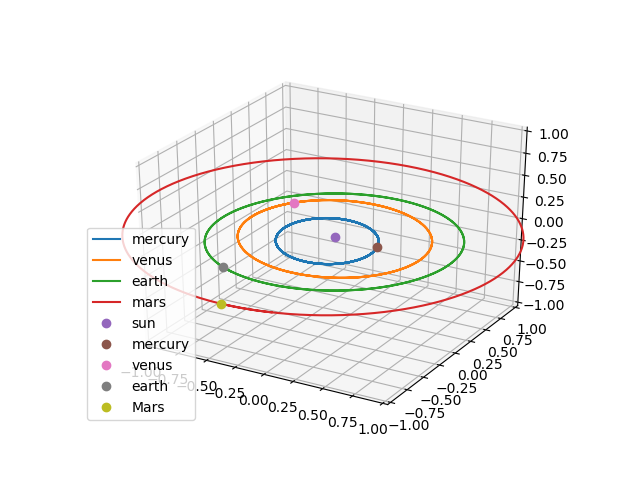

In [6]:
orbit = np.load('orbits.npz')
#loading the infor
planets = ["mercury","venus","earth","mars"]
x = np.linspace(0,2*np.pi,100)
t = np.arange(0,100)
#for more details see above problem
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.set_xlim((-1,1))
ax.set_ylim((-1,1))
ax.set_zlim((-1,1))
#make the things nicer
me = orbit["mercury"]
v = orbit["venus"]
e = orbit["earth"]
ma = orbit["mars"]
#plots each line and the starting point.
plt.plot(me[:,0],me[:,1],me[:,2],label="mercury")
plt.plot(v[:,0],v[:,1],v[:,2],label="venus")
plt.plot(e[:,0],e[:,1],e[:,2],label="earth")
plt.plot(ma[:,0],ma[:,1],ma[:,2],label="mars")
plt.plot([0],[0],[0],'o',label="sun")
plt.plot([me[0,0]],[me[0,1]],[me[0,2]],'o',label="mercury")
plt.plot([v[0,0]],[v[0,1]],[v[0,2]],'o',label="venus")
plt.plot([e[0,0]],[e[0,1]],[e[0,2]],'o',label="earth")
plt.plot([ma[0,0]],[ma[0,1]],[ma[0,2]],'o',label="Mars")
plt.legend()
plt.show()

## Problem 3

Each row of the arrays in `orbits.npz` gives the position of the planets at a
particular time. The arrays have 1400 points in time over a 700 day period (beginning on 2018-5-30). Create a 3D animation of the planet orbits. Display lines for the trajectories of the orbits and points for the current positions of the planets at each point in time. Your update() function will need to return a list of `Line3D` objects, one for each orbit trajectory and one for each planet position marker. Using `animation.save()`, save your animated plot as "planet_ani.mp4".

To display the mp4 video in the Jupyter Notebook, run the following code in a markdown cell:

`<video src="planet_ani.mp4" controls>`

In [7]:
def update(i):
    #venus and make 3d
    particlev.set_data(venus[i,0],venus[i,1])
    particlev.set_3d_properties(venus[i,2])
    trajv.set_data(venus[:i+1,0],venus[:i+1,1])
    trajv.set_3d_properties(venus[:i+1,2])
    #mercuyr
    particleme.set_data(mercury[i,0],mercury[i,1])
    particleme.set_3d_properties(mercury[i,2])
    trajme.set_data(mercury[:i+1,0],mercury[:i+1,1])
    trajme.set_3d_properties(mercury[:i+1,2])
    #earth
    particlee.set_data(earth[i,0],earth[i,1])
    particlee.set_3d_properties(earth[i,2])
    traje.set_data(earth[:i+1,0],earth[:i+1,1])
    traje.set_3d_properties(earth[:i+1,2])
    #mars
    particlema.set_data(mars[i,0],mars[i,1])
    particlema.set_3d_properties(mars[i,2])
    trajma.set_data(mars[:i+1,0],mars[:i+1,1])
    trajma.set_3d_properties(mars[:i+1,2])
    
    return particlev,trajv,particleme,trajme,particlee,traje,particlema,trajma


In [ ]:
orbit = np.load('orbits.npz')
mercury = orbit["mercury"]
venus = orbit["venus"]
earth = orbit["earth"]
mars = orbit["mars"]
#the writer to export and make a pretty video
animation.writer = animation.writers['ffmpeg']
plt.ioff()
#see problem 1 comments.
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.set_xlim((-1,1))
ax.set_ylim((-1,1))
ax.set_zlim((-1,1))

#create the empty lists that update is going to fill and make the color and dots pretty to send into the magic funtion.
trajme, = plt.plot([],[],[],color='r',alpha=0.5)
particleme, = plt.plot([],[],[],color='r',marker='o',alpha=0.5)
trajv, = plt.plot([],[],[],color='y',alpha=0.5)
particlev, = plt.plot([],[],[],color='y',marker='o',alpha=0.5)
traje, = plt.plot([],[],[],color='b',alpha=0.5)
particlee, = plt.plot([],[],[],color='b',marker='o',alpha=0.5)
trajma, = plt.plot([],[],[],color='g',alpha=0.5)
particlema, = plt.plot([],[],[],color='g',marker='o',alpha=0.5)
#magic
ani = animation.FuncAnimation(fig, update, frames=range(1400), interval=25)
ani.save('Nathan_planet.mp4')

plt.show()

<video src="planet_ani.mp4" controls>

## Problem 4

Make a surface plot of the bivariate normal density function given by:

$$f(\mathbf{x}) = \frac{1}{\sqrt{det(2\pi\Sigma)}}exp[-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{T}\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})]$$

Where $\mathbf{x} = [x,y]^T \in \mathbb{R}^2$, $\mathbf{\mu} = [0,0]^T$ is the mean vector, and: $$\Sigma = \begin{bmatrix} 1 & 3/5 \\ 3/5 & 2 \end{bmatrix}$$ is the covariance matrix.

<IPython.core.display.Javascript object>


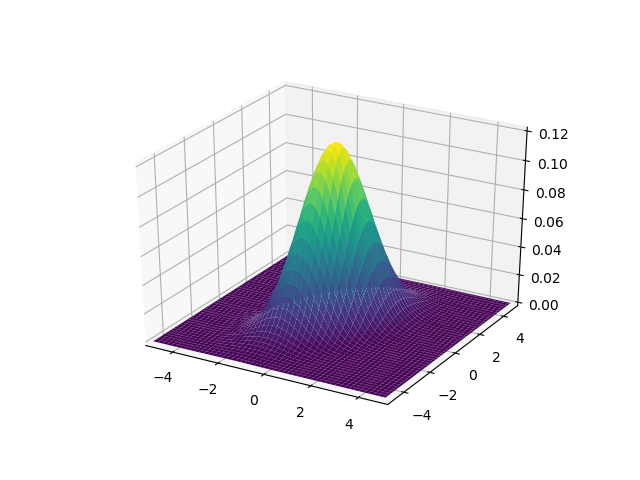

In [8]:
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
X,Y = np.meshgrid(x,y)

x = np.array([[x],[y]])

#The constants are the values of sigma inverse so that it doesn't need to be computed.
sigma = np.array([[1,(3/5)],[(3/5),2]])
#print(np.linalg.inv(sigma))
a = 1.2195122
b =-0.36585366
c = -0.36585366
d = 0.6097561

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.set_xlim((-5,5))
ax.set_ylim((-5,5))
ax.set_zlim((0,.12))

f = lambda x,y: ((1/(np.sqrt(np.linalg.det(2*np.pi*sigma))))*np.exp(-1/2*(x**2*a+x*y*c+x*y*b+y**2*d)))

Z = f(X,Y)

ax.plot_surface(X,Y,Z, cmap="viridis")

plt.show()

## Problem 5

Use the data in vibration.npz to produce a surface animation of the solution
to the wave equation for an elastic rectangular membrane. The file contains three NumPy arrays: `X`, `Y`, `Z`. `X` and `Y` are meshgrids of shape `(300,200)` corresponding to 300 points in
the y-direction and 200 points in the x-direction, all corresponding to a 2x3 rectangle with one corner at the origin. `Z` is of shape `(150,300,200)`, giving the height of the vibrating membrane at each (x,y) point for 150 values of time. In the language of partial differential equations, this is the solution to the following intital/boundary value problem for the wave equation:

$$u_{tt} = 6^2(u_{xx}+u_{yy})$$
$$(x,y) \in [0,2]\times[0,3],t \in [0,5]$$
$$u(t,0,y)=u(t,2,y)=u(t,x,0)=u(t,x,3) = 0$$
$$u(0,x,y) = xy(2-x)(3-y)$$

Load the data with `np.load('vibration.npz')`. Create a 3D surface animation of the vibrating membrane. Save the animation as `vibration.mp4`.

In [10]:
def update(i):
    ax.clear()
    ax.set_xlim((0,2))
    ax.set_ylim((0,3))
    ax.set_zlim((-3,3))
    thing = ax.plot_surface(X, Y, Z[i])
    return thing


<IPython.core.display.Javascript object>


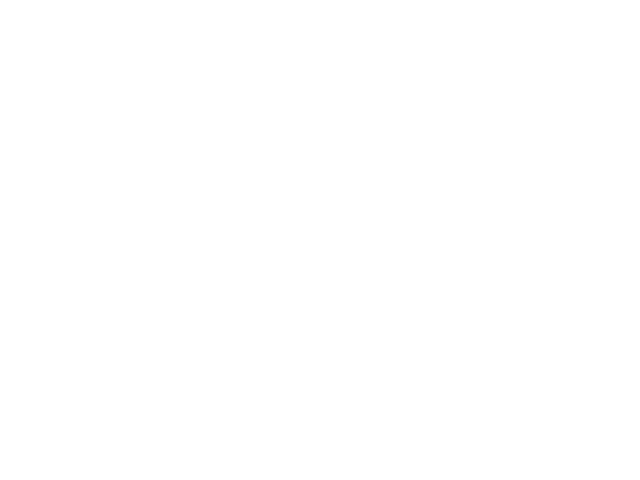

IndexError: index 150 is out of bounds for axis 0 with size 150

In [11]:
data = np.load('vibration.npz')
X = data['X']
Y = data['Y']
Z = data['Z']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

animation.writer = animation.writers['ffmpeg']
plt.ioff()

ani = animation.FuncAnimation(fig, update, frames=range(1400), interval=25)

ani.save('vibrationNathan.mp4')

plt.show()

#ax.plot_surface(X,Y,Z)


<video src="vibrationNathan.mp4" controls>
    